In [1]:
import numpy as np
from scipy.linalg import svd
from matplotlib.image import imread
import matplotlib.pyplot as plt
from random import normalvariate
from math import sqrt
import os
plt.rcParams['figure.figsize'] = [16, 8]

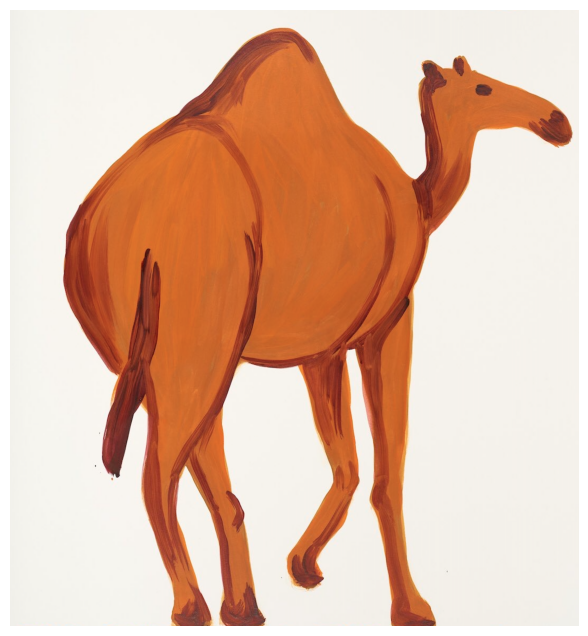

In [2]:
archivo = 'camello_shrigley.jpg'
imagen = imread(archivo)
img = plt.imshow(imagen)
plt.axis('off')
plt.show()

# Separar en RGB
red = imagen[:,:,0]
green = imagen[:,:,1]
blue = imagen[:,:,2]

In [3]:
def svd_approx(canal, r=500):
    U, S, Vt = svd(canal, full_matrices=False)
    S = np.diag(S)
    
    img_approx = U[:,:r] @ S[:r,:r] @ Vt[:r,:]
    return img_approx   

In [4]:
def to_rgb(red, green, blue):    
    red[red > 1] = 1
    red[red < 0] = 0
    green[green > 1] = 1
    green[green < 0] = 0
    blue[blue > 1] = 1
    blue[blue < 0] = 0
    
    # Regresar en formato RGB
    return  np.dstack([red, green, blue])    

In [5]:
r = 500
red_appr = svd_approx(red, r)
green_appr = svd_approx(green, r)
blue_appr = svd_approx(blue, r)

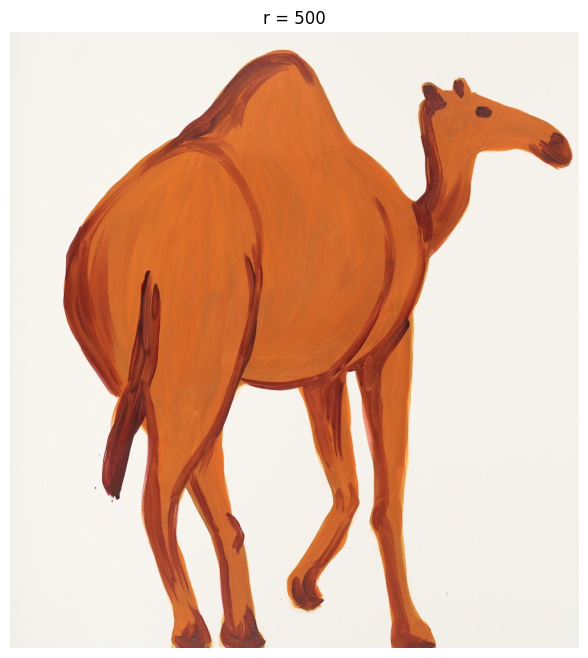

In [6]:
imagen_appr = to_rgb(red_appr, green_appr, blue_appr)

img = plt.imshow(imagen_appr)
plt.axis('off')
plt.title(f'r = {r}')
plt.show()